# Importing results for 4 layers

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

reductionMethods = ['avg',"dilated",'max','strided']
filterNums = ['4','8','16','32','50','100','128']
layers = ['4']
test_results = {}
learning_curves = {}
training_curves = {}
validation_curves = {}
best_val = {}
for num in filterNums:
    for layer in layers:
        for method in reductionMethods:
            name = 'f'+num+"_l"+layer+"_"+method
            test_results[name] = np.genfromtxt('test/'+ name +'/result_outputs/test_summary.csv', 
                                           skip_header=1,delimiter=',')
            temp = test_results[name];
            test_results[name] = temp[0]
            learning_curves[name] = np.genfromtxt('test/'+name+'/result_outputs/summary.csv', 
                                           skip_header=1,delimiter=',')
            temp = learning_curves[name];
            training_curves[name] = temp[:,0]
            validation_curves[name] = temp[:,2]
            best_val[name] = np.max(validation_curves[name])

In [13]:
test_method_best = {}
val_method_best = {}
for method in reductionMethods:
    test_method_best[method] = (0,0)
    val_method_best[method] = (0,0)
for method in reductionMethods:
    for num in filterNums:
        for layer in layers:
            name = 'f'+num+"_l"+layer+"_"+method
            (val,_) = test_method_best[method]
            if(test_results[name] > val):
                test_method_best[method] = (test_results[name],num)
            val,_ = val_method_best[method]
            if(best_val[name]> val):
                val_method_best[method] = (best_val[name],num)
for method in reductionMethods:
    print(method,test_method_best[method])
print()
for method in reductionMethods:
    print(method,val_method_best[method])


avg (0.8831012658227848, '128')
dilated (0.8818354430379746, '100')
max (0.8804430379746836, '128')
strided (0.8812658227848101, '100')

avg (0.89126582278481, '100')
dilated (0.8926582278481014, '128')
max (0.8898734177215192, '128')
strided (0.8892405063291139, '128')


In [15]:
for num in filterNums:
    for method in reductionMethods:
        name = 'f'+num+"_l"+layer+"_"+method
        print("%.4f %s  " % (test_results[name],name), sep='', end='', flush=True)
    print()

0.7363 f4_l4_avg  0.7972 f4_l4_dilated  0.7410 f4_l4_max  0.7949 f4_l4_strided  
0.8346 f8_l4_avg  0.8625 f8_l4_dilated  0.8349 f8_l4_max  0.8580 f8_l4_strided  
0.8705 f16_l4_avg  0.8720 f16_l4_dilated  0.8692 f16_l4_max  0.8713 f16_l4_strided  
0.8798 f32_l4_avg  0.8792 f32_l4_dilated  0.8772 f32_l4_max  0.8692 f32_l4_strided  
0.8805 f50_l4_avg  0.8812 f50_l4_dilated  0.8760 f50_l4_max  0.8731 f50_l4_strided  
0.8825 f100_l4_avg  0.8818 f100_l4_dilated  0.8803 f100_l4_max  0.8813 f100_l4_strided  
0.8831 f128_l4_avg  0.8798 f128_l4_dilated  0.8804 f128_l4_max  0.8789 f128_l4_strided  


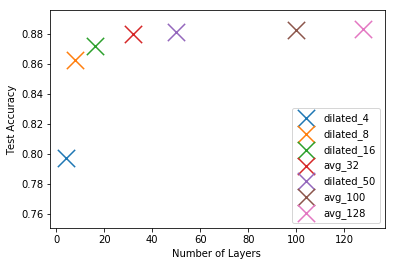

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)  
test_loc = []
test_score = []
for num in filterNums:
    best = 0
    method_used = None
    for method in reductionMethods:
        name = 'f'+num+'_l4_'+method
        y = test_results[name]
        if(y > best):
                method_used = method
                best = y
    ax.scatter(int(num),best,label = method_used+'_'+num,marker='x',s=300)
    ax.axes.set_xlabel("Number of Layers ")
    ax.axes.set_ylabel("Test Accuracy")
    ax.legend()
    plt.subplots_adjust(wspace=0.4)
fig.savefig("Best Test accuraccy.pdf")
plt.show()


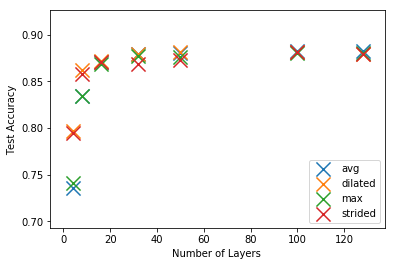

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
x = [4,8,16,32,50,100,128]
for method in reductionMethods:
    test1 = []
    for num in filterNums:
        name = 'f'+num+'_l4_'+method
        y = test_results[name]
        test1.append(y)
    ax.scatter(x,test1,label = method,marker='x',s=200)
ax.axes.set_xlabel("Number of Layers ")
ax.axes.set_ylabel("Test Accuracy")
ax.legend()
plt.subplots_adjust(wspace=0.4)
fig.savefig("Difference_reduction.pdf")
plt.show()

# Different number of filter on some methods on 4 Layers

/home/timos/anaconda3/envs/mlp/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


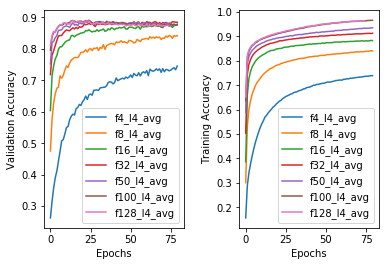

In [7]:
fig = plt.figure()

for number in filterNums:
    name = 'f'+number+"_l4"+"_avg"
    y = validation_curves[name]
    x = np.arange(y.shape[0])
    ax = fig.add_subplot(1,2,1)  
    ax.plot(x,y,label = name)
    ax.axes.set_xlabel("Epochs")
    ax.axes.set_ylabel("Validation Accuracy")
    ax.legend()
for number in filterNums:
    name = 'f'+number+"_l4"+"_avg"
    y = training_curves[name]
    x = np.arange(y.shape[0])
    ax = fig.add_subplot(1,2,2)  
    ax.plot(x,y,label = name)
    ax.axes.set_xlabel("Epochs")
    ax.axes.set_ylabel("Training Accuracy")
    ax.legend()
plt.subplots_adjust(wspace=0.4)
fig.savefig("number_of_layer_avg_max.pdf");
plt.show()

In [8]:
best = -1
method_best_test = None
for method in reductionMethods:
    if(test_method_best[method] > best):
        best  = test_method_best[method]
        method_best_test = method
print("Best test accuracy:",method_best_test,test_method_best[method_best_test])

best = -1
method_best_val = None
for method in reductionMethods:
    if(val_method_best[method] > best):
        best  = val_method_best[method]
        method_best_val = method
        
print("Best val  accuracy:",method_best_val,test_method_best[method_best_val])
        

TypeError: '>' not supported between instances of 'tuple' and 'int'

# Best method for the different number of filters

In [9]:
test_method_best = {}

for method in reductionMethods:
    test_method_best[method] = 0
    val_method_best[method] = 0

for method in reductionMethods:
    for num in filterNums:
        for layer in layers:
            name = 'f'+num+"_l"+layer+"_"+method
            if(test_results[name] > test_method_best[method]):
                test_method_best[method] = test_results[name]
            if(best_val[name]> val_method_best[method]):
                val_method_best[method] = best_val[name]


# Import results for 8 layers

In [10]:
test_results_8l = {}
learning_curves_8l = {}
training_curves_8l = {}
validation_curves_8l = {}
layers = ['8']
best_val_8l = {}

reductionMethods = ['avg','max']
filterNums = ['4','8','16','32','50','100']
for num in filterNums:
    for layer in layers:
        for method in reductionMethods:
            name = 'f'+num+"_l"+layer+"_"+method
            test_results_8l[name] = np.genfromtxt('8l/'+ name +'/result_outputs/test_summary.csv', 
                                           skip_header= 1,delimiter=',')
            temp = test_results_8l[name];
            test_results_8l[name] = temp[0]
            learning_curves_8l[name] = np.genfromtxt('8l/'+name+'/result_outputs/summary.csv', 
                                           skip_header= 1,delimiter=',')
            temp = learning_curves_8l[name];
            training_curves_8l[name] = temp[:,0]
            validation_curves_8l[name] = temp[:,2]
            best_val_8l[name] = np.max(validation_curves_8l[name])

In [29]:
filterNums = ['4','8','16','32','50','100']


# Comparison between layer number

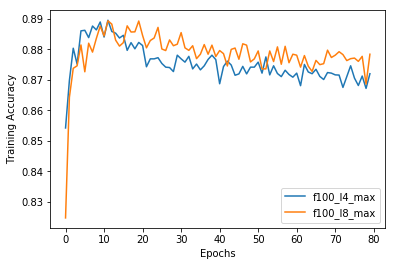

In [30]:
number = '100' 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)  
name = 'f'+number+'_l4_max'
y = validation_curves[name]
x = np.arange(y.shape[0])
ax.plot(x,y,label = name)
name = 'f'+number+'_l8_max'
y = validation_curves_8l[name]
x = np.arange(y.shape[0])
ax.plot(x,y,label = name)
ax.axes.set_xlabel("Epochs")
ax.axes.set_ylabel("Training Accuracy")
ax.legend()
plt.subplots_adjust(wspace=0.4)
fig.savefig("Similar results.pdf")
for num in filterNums:
    name = 'f'+num+'_l8_max'
#     print(name,test_results_8l[name])
plt.show()

# Number of layers on deeper network

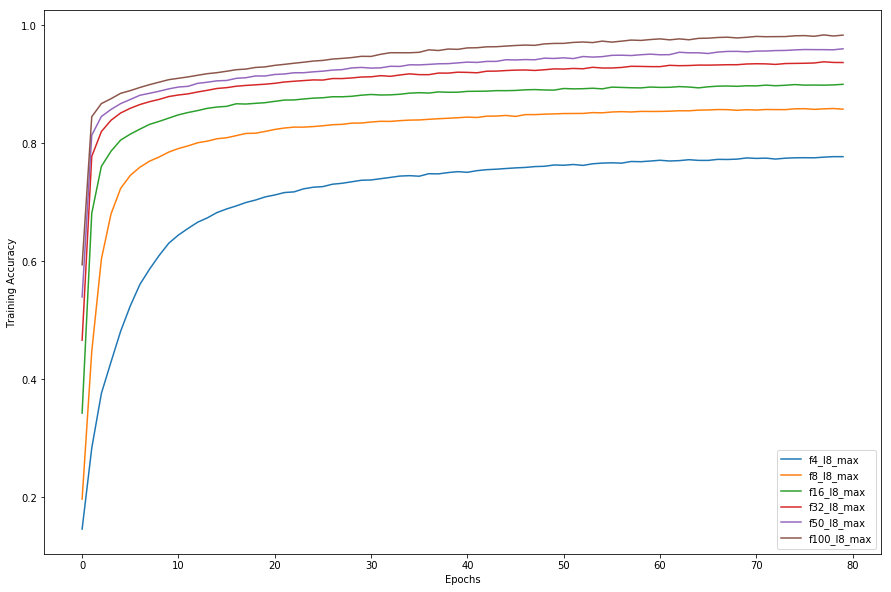

In [31]:
fig = plt.figure(figsize=(15,10))
for number in filterNums:
    name = 'f'+number+"_l8"+"_max"
    y = training_curves_8l[name]
    x = np.arange(y.shape[0])
    ax = fig.add_subplot(1,1,1)  
    ax.plot(x,y,label = name)
    ax.axes.set_xlabel("Epochs")
    ax.axes.set_ylabel("Training Accuracy")
    ax.legend()

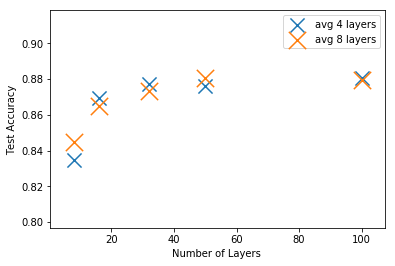

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
x = [8,16,32,50,100]
test1 = []
for num in ['8','16','32','50','100']:
    name = 'f'+num+'_l4_max'
    y = test_results[name]
    test1.append(y)
ax.scatter(x,test1,label = method+" 4 layers",marker='x',s=200)
test1 = []
for num in ['8','16','32','50','100']:
    name = 'f'+num+'_l8_max'
    y = test_results_8l[name]
    test1.append(y)
ax.scatter(x,test1,label = method+" 8 layers",marker='x',s=300)
ax.axes.set_xlabel("Number of Layers ")
ax.axes.set_ylabel("Test Accuracy")
ax.legend()
plt.subplots_adjust(wspace=0.4)
fig.savefig("Similar results.pdf")
plt.show()

In [33]:
for num in filterNums:
    name = 'f'+num+"_l8_max"
    print(test_results_8l[name],num)

0.7685443037974684 4
0.8446835443037973 8
0.865126582278481 16
0.8732278481012659 32
0.8805696202531645 50
0.879620253164557 100
